<h1>ETHEREUM (ETH) PRICE PREDICTION CON UNA RETE RNN-LSTM</h1>

Progetto per Introduzione all'Intelligenza Artificiale di Matteo di Giorgio e Marco Rizza

</br><h1>Dati storici da BitMEX</h1>

Andiamo a scaricare i dati storici di Bitcoin dall'exchange di BitMEX

In [1]:
from bitmex import bitmex
import os.path
import pandas as pd
import math
from tqdm import tqdm
import time
from datetime import timedelta
from dateutil import parser
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [2]:
# BITMEX API
bitmex_api_key = 'G6Uw_k_BxAuGSixig1lL-mG7'
bitmex_api_secret = 'MHHIqaAsWrg9FAMzZ7YTRJbAjlWuSOxVA2ZRAVYV4CZc2WBA'

binsizes = {"1m": 1, "5m": 5, "1h": 60, "1d": 1440}
batch_size = 750
bitmex_client = bitmex(api_key = bitmex_api_key, api_secret = bitmex_api_secret)

def minutes_of_new_data(symbol, kline_size, data, source):
    if len(data) > 0:  old = parser.parse(data["timestamp"].iloc[-1])
    elif source == "bitmex": old = bitmex_client.Trade.Trade_getBucketed(symbol=symbol, binSize=kline_size, count=1, reverse=False).result()[0][0]['timestamp']
    if source == "bitmex": new = bitmex_client.Trade.Trade_getBucketed(symbol=symbol, binSize=kline_size, count=1, reverse=True).result()[0][0]['timestamp']
    return old, new

def get_historical_data(symbol, kline_size, save = False):
    filename = '%s-%s-data.csv' % (symbol, kline_size)
    if os.path.isfile(filename): data_df = pd.read_csv(filename)
    else: data_df = pd.DataFrame()
    oldest_point, newest_point = minutes_of_new_data(symbol, kline_size, data_df, source = "bitmex")
    delta_min = (newest_point - oldest_point).total_seconds() / 60
    available_data = math.ceil(delta_min/binsizes[kline_size])
    rounds = math.ceil(available_data / batch_size)
    
    if rounds > 0:
        print('Downloading %d minutes of new data available for %s, i.e. %d instances of %s data in %d rounds.' % (delta_min, symbol, available_data, kline_size, rounds))
        for round_num in tqdm(range(rounds)):
            time.sleep(1)
            new_time = (oldest_point + timedelta(minutes = round_num * batch_size * binsizes[kline_size]))
            data = bitmex_client.Trade.Trade_getBucketed(symbol=symbol, binSize=kline_size, count=batch_size, startTime = new_time).result()[0]
            temp_df = pd.DataFrame(data)
            data_df = data_df.append(temp_df)
    data_df.set_index('timestamp', inplace=True)
    if save and rounds > 0: data_df.to_csv(filename)
        
    print('Done.')
    return data_df

A:\Programmi\Anaconda\lib\site-packages\swagger_spec_validator\validator20.py:49: SwaggerValidationWarning: Found "$ref: #/definitions/UserPreferences" with siblings that will be overwritten. See https://stackoverflow.com/a/48114924 for more information. (path #/definitions/User/properties/preferences)
  warnings.warn(


</br>Raccogliamo i dati da BitMEX della criptovaluta Ethereum (ETH) e li mettiamo in un file csv

In [3]:
get_historical_data("ETHUSD", "1h", save = True)

  0%|                                                                                           | 0/32 [00:00<?, ?it/s]

100%|██████████████████████████████████████████████████████████████████████████████████| 32/32 [00:37<00:00,  1.18s/it]


Done.


,symbol,open,high,low,close,trades,volume,vwap,lastSize,turnover,homeNotional,foreignNotional
timestamp,,,,,,,,,,,,
2018-07-19 04:00:00+00:00,ETHUSD,475.03,475.56,474.67,474.67,6,27,475.2167,7.0,128308500,19.785068,9402.198833
2018-07-19 05:00:00+00:00,ETHUSD,474.67,476.43,474.41,476.01,20,77,475.6900,2.0,366281300,56.441463,26848.645809
2018-07-19 06:00:00+00:00,ETHUSD,476.01,475.91,474.56,475.19,18,83,475.0588,7.0,394298800,60.772057,28870.307636
2018-07-19 07:00:00+00:00,ETHUSD,475.19,478.22,475.15,478.22,34,127,476.6694,7.0,605370100,93.275578,44461.621935
2018-07-19 08:00:00+00:00,ETHUSD,478.22,477.96,476.07,476.41,34,147,477.0287,2.0,701232100,107.724441,51387.683254
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-13 05:00:00+00:00,ETHUSD,2202.30,2202.30,2104.45,2202.20,24,78,2182.3400,4.0,17022230,4.720053,10300.677759
2021-04-13 06:00:00+00:00,ETHUSD,2202.20,2202.30,2085.00,2202.30,36,226,2170.8700,4.0,49061590,13.704156,29750.053764
2021-04-13 07:00:00+00:00,ETHUSD,2202.30,2202.30,2085.00,2085.00,24,84,2171.5000,1.0,18240550,5.102896,11080.963830


</br>Con la funzione read_csv di Pandas andiamo a leggere il file csv appena scaricato e mostriamo il contenuto all'interno

In [4]:
df = pd.read_csv('ETHUSD-1h-data.csv')

In [5]:
df

,timestamp,symbol,open,high,low,close,trades,volume,vwap,lastSize,turnover,homeNotional,foreignNotional
0,2018-07-19 04:00:00+00:00,ETHUSD,475.03,475.56,474.67,474.67,6,27,475.2167,7.0,128308500,19.785068,9402.198833
1,2018-07-19 05:00:00+00:00,ETHUSD,474.67,476.43,474.41,476.01,20,77,475.6900,2.0,366281300,56.441463,26848.645809
2,2018-07-19 06:00:00+00:00,ETHUSD,476.01,475.91,474.56,475.19,18,83,475.0588,7.0,394298800,60.772057,28870.307636
3,2018-07-19 07:00:00+00:00,ETHUSD,475.19,478.22,475.15,478.22,34,127,476.6694,7.0,605370100,93.275578,44461.621935
4,2018-07-19 08:00:00+00:00,ETHUSD,478.22,477.96,476.07,476.41,34,147,477.0287,2.0,701232100,107.724441,51387.683254
...,...,...,...,...,...,...,...,...,...,...,...,...,...
23977,2021-04-13 05:00:00+00:00,ETHUSD,2202.30,2202.30,2104.45,2202.20,24,78,2182.3400,4.0,17022230,4.720053,10300.677759
23978,2021-04-13 06:00:00+00:00,ETHUSD,2202.20,2202.30,2085.00,2202.30,36,226,2170.8700,4.0,49061590,13.704156,29750.053764
23979,2021-04-13 07:00:00+00:00,ETHUSD,2202.30,2202.30,2085.00,2085.00,24,84,2171.5000,1.0,18240550,5.102896,11080.963830
23980,2021-04-13 08:00:00+00:00,ETHUSD,2085.00,2158.85,2085.00,2085.00,15,43,2133.0900,2.0,9172280,2.621890,5592.669969


</br><h1>Preparazione del dataset</h1>

Andiamo ad eliminare la feature 'symbol' che e' una stringa e una variabile di tipo qualitativo

In [6]:
del df['symbol']

</br>Controlliamo i tipi di variabili che abbiamo nel dataset

In [7]:
df.dtypes

timestamp           object
open               float64
high               float64
low                float64
close              float64
trades               int64
volume               int64
vwap               float64
lastSize           float64
turnover             int64
homeNotional       float64
foreignNotional    float64
dtype: object

</br>Convertiamo la feature 'timestamp', che ora e' un oggetto, in un tipo datetime con un formato di data custom

In [8]:
df['timestamp'] = pd.to_datetime(df['timestamp']).dt.strftime('%Y-%m-%d %H:%M')
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [9]:
df = df.sort_values(by='timestamp')                           # Ordiniamo le variabili
df.rename(columns = {'timestamp':'datetime'}, inplace = True) # Ridenominiamo la feature

</br>Controlliamo i valori nulli che abbiamo nel dataset e li andiamo ad eliminare

In [10]:
df.isnull().sum()

datetime             0
open                 0
high                 0
low                  0
close                0
trades               0
volume               0
vwap               142
lastSize           142
turnover             0
homeNotional         0
foreignNotional      0
dtype: int64

In [11]:
df = df.dropna()

</br><h1>Studio della correlazione tra le variabili e il nostro target</h1>

In [12]:
corr = df.corr()

<AxesSubplot:>

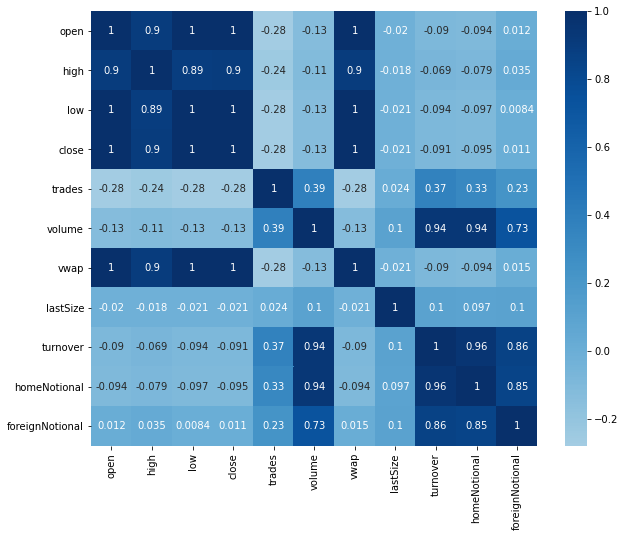

In [13]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr, center=0, cmap='Blues', annot=True)

</br>Notiamo dalla heatmap qui sopra, con ha un intervallo di correlazione tra -1 e 1, che il nostro target 'close' ha alcune variabili molto correlate.</br>Andiamo a filtrare e a tenere solo quelle con un coeffeciente maggiore di 0.5

In [14]:
pd.DataFrame(corr[corr > 0.5]['close']).T

,open,high,low,close,trades,volume,vwap,lastSize,turnover,homeNotional,foreignNotional
close,0.997033,0.895535,0.998414,1.0,NaN,NaN,0.998317,NaN,NaN,NaN,NaN


</br><h1>Data Preprocessing</h1>

In [15]:
cols = list(['close', 'high', 'low', 'open', 'vwap']) # Selezioniamo quindi le variabili che nella tabella qui sopra non hanno valori NaN
y_target = 'close'                                    # Scegliamo la nostra variabile di target
n_time_steps = 24                                     # Scegliamo il numero di step temporali usati per prevedere il futuro

Spiegazione dei valori scelti:

- close:
- high:
- low:
- open:
- vwap:

</br>Estraiamo le date per metterle come indici e creiamo il nuovo dataset mantendendo solo le colonne con le variabili correlate scelte sopra

In [16]:
dataset_datelist = list(df['datetime'])
dataset = pd.DataFrame(df, columns=cols)

</br>Convertiamo gli indici in una variabile datetime

In [17]:
dataset.index = dataset_datelist
dataset.index = pd.to_datetime(dataset.index)

In [18]:
print('Training set shape: {}'.format(dataset.shape))
print('Feature: {}'.format(cols))
print('Target: {}'.format(y_target))
print('Time Steps: {}'.format(n_time_steps))

Training set shape: (23840, 5)
Feature: ['close', 'high', 'low', 'open', 'vwap']
Target: close
Time Steps: 24


In [19]:
dataset.head(3)

,close,high,low,open,vwap
2018-07-19 04:00:00,474.67,475.56,474.67,475.03,475.2167
2018-07-19 05:00:00,476.01,476.43,474.41,474.67,475.6900
2018-07-19 06:00:00,475.19,475.91,474.56,476.01,475.0588


</br><h1>Split del dataset in training set e test set</h1>

In [20]:
train_split = 0.8

In [21]:
Data = dataset.values                                # Converto il dataset in numpy array

In [22]:
train_data_size = math.ceil(len(Data) * train_split) # 80% della size completa della lunghezza del dataset
test_data_size = len(dataset) - train_data_size      # 20% della size completa della lunghezza del dataset

In [23]:
train = dataset[0:train_data_size]                   # Creazione del dataset di train
test = dataset[train_data_size:len(dataset)]         # Crezione del dataset di test

In [24]:
print('Train shape: {}.'.format(train.shape))
print('Test shape: {}.'.format(test.shape))

Train shape: (19072, 5).
Test shape: (4768, 5).


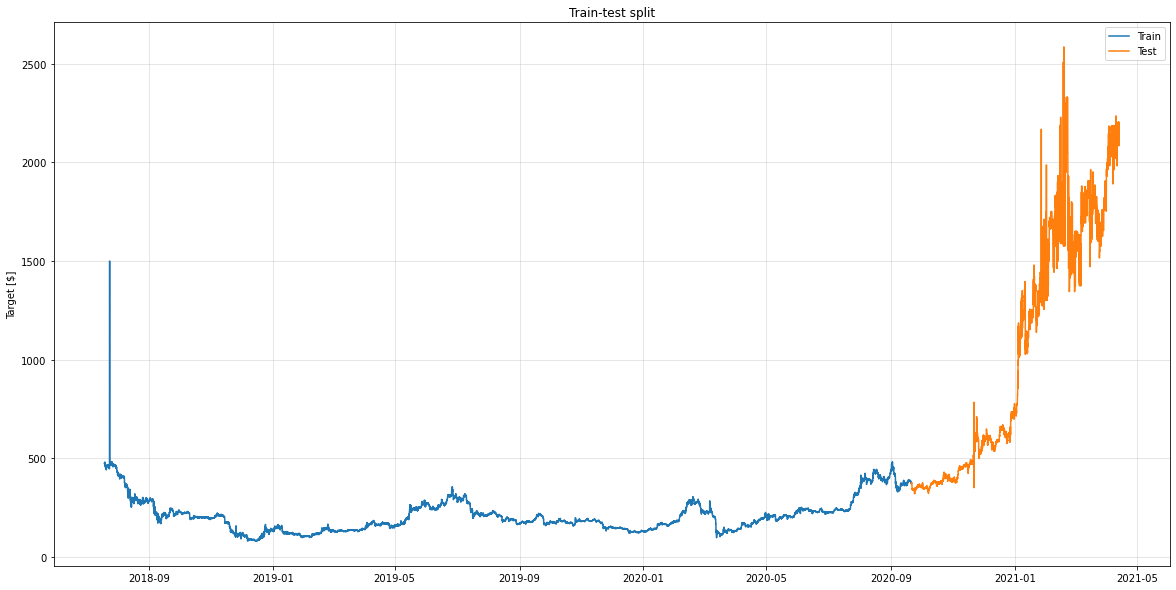

In [25]:
plt.figure(figsize=[20, 10])
plt.title('Train-test split')
plt.ylabel('Target [$]')
plt.plot(train['close'], label='Train')
plt.plot(test['close'], label='Test')
plt.grid(which='major', color='#c1c1c1', alpha=0.5)
plt.legend()

</br><h1>Normalizzazione dei dataset creati</h1>

Andiamo a normalizzare il dataset di training

In [26]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
training_scaled_data = scaler.fit_transform(train)

<br>Prendiamo gli ultimi 24 elementi del dataset di training e li aggiungiamo al dataset di test

In [27]:
look_back_train_data = train.tail(n_time_steps)
testing_data = look_back_train_data.append(test)

</br>Andiamo a normalizzare il dataset di test

In [28]:
scaler_test = StandardScaler()
testing_scaled_data = scaler_test.fit_transform(testing_data)

</br>Andiamo a normalizzare il target perche' la rete dara' in uscita un solo valore

In [29]:
scaler_test_predict = StandardScaler()
scaler_test_predict.fit_transform(testing_data.iloc[:, 0:1])

array([[-1.03815692],
       [-1.03497858],
       [-1.03497858],
       ...,
       [ 1.7325432 ],
       [ 1.7325432 ],
       [ 1.92373275]])

</br>Una rete LSTM vuole sempre un array tridimensionale in input quindi dobbiamo sistemare gli shape dei dataset creati.
</br>La matrice e' cosi composta LSTM(batch_size, time_steps, unit).

In [30]:
def create_multivariate(windows, n_steps):
    X = list()
    y = list()
    
    for i in range(len(windows)):
        end = i + n_steps
        if end > len(windows)-1:
            break
            
        seq_x = windows[i:end, :] # Crea le sequenze per definire finestre di 24 valori
        X.append(seq_x)           # Aggiungiamo la sequenza di 24 ore e continuiamo per
                                  # formare una matrice di (n, 24, n) valori e quindi multivariate
            
        seq_y = windows[end, :]
        y.append(seq_y)
        
    return np.array(X), np.array(y)

In [31]:
X_train, y_train = create_multivariate(training_scaled_data, n_time_steps)
print('X Train: {}.'.format(X_train.shape))
print('Y Train shape: {}.'.format(y_train.shape))

X Train: (19048, 24, 5).
Y Train shape: (19048, 5).


In [32]:
X_test, y_test = create_multivariate(testing_scaled_data, n_time_steps)
print('X Test shape: {}.'.format(X_test.shape))
print('Y Test shape: {}.'.format(y_test.shape))

X Test shape: (4768, 24, 5).
Y Test shape: (4768, 5).


</br><h1>Creazione di una rete RNN-LSTM</h1>

La Long Short-Term Memory (LSTM) è una versione avanzata dell'architettura delle reti neurali ricorrenti (RNN) che è stata progettata per modellare le sequenze cronologiche e le loro dipendenze a lungo raggio in modo più preciso delle RNN convenzionali, quindi adatto perfettamente come nel nostro caso a serie temporali.

In [33]:
def LSTM_model(X_train, y_train, X_test, y_test, epochs, batch_size, shuffle=False):
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import LSTM, Dropout, Dense
    
    model = Sequential()
    
    model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]))) # Layer di input con una matrice in questo caso di (1, 24, 5)
    
    model.add(LSTM(units=40))                                                                          # Hidden Layer
    
    model.add(Dense(units=X_train.shape[2], activation='linear'))                                      # Layer di output con una matrice in questo caso di (1, 5, 1)
    
    model.compile(optimizer='rmsprop', loss='mean_squared_error')    
    model.summary()
  
    history = model.fit(X_train, y_train, shuffle=shuffle, validation_data=(X_test, y_test), epochs=epochs, verbose=2, batch_size=batch_size).history
  
    return history, model

In [34]:
# history, model = LSTM_model(X_train, y_train, X_test, y_test, epochs=30, batch_size=256, shuffle=False)

In [35]:
# model.save('ETHUSD-1h-MODEL-LSTM.h5')

In [36]:
from keras.models import load_model
model = load_model('ETHUSD-1h-MODEL-LSTM.h5')

In [37]:
# import matplotlib.pyplot as plt
# plt.plot(history['loss'], label='Loss')
# plt.plot(history['val_loss'], label='Val Loss')
# plt.legend()

</br><h1>Visualizzazione delle prestazione del modello sul dataset di test e RMSE</h1>

Facciamo la prediction con i valori di test

In [38]:
predictions_test = model.predict(X_test)

</br>Invertiamo la prediction fatta e la y del dataset di test, perche' ancora normalizzate, per poi avere le misure originali in dollari

In [39]:
y_pred_test = scaler_test_predict.inverse_transform(np.array(predictions_test)[:, 0])
y_actual_test = scaler_test_predict.inverse_transform(np.array(y_test)[:,0])

</br>Andiamo a creare il dataset aggiungendo la label del target scelto (close) e a settare gli indici come date per avere una visualizzazione piu' chiara

In [40]:
y_test_serie = pd.DataFrame(y_actual_test, columns=[y_target]).set_index(testing_data[n_time_steps:].index)
y_pred_serie = pd.DataFrame(y_pred_test, columns=[y_target]).set_index(testing_data[n_time_steps:].index)

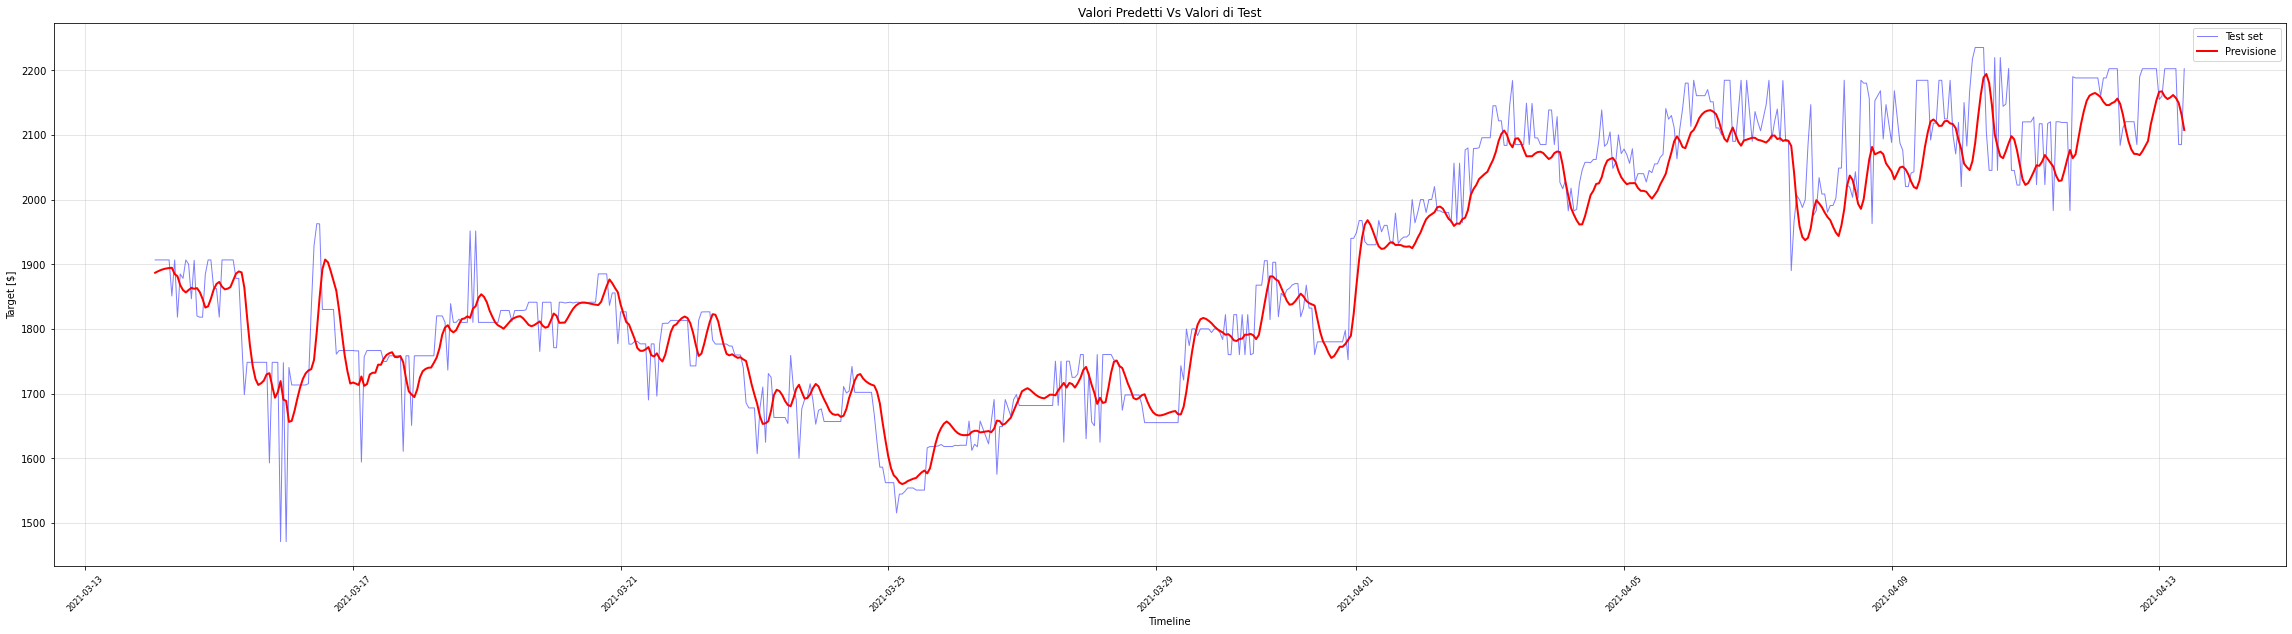

In [41]:
plt.figure(figsize=[40, 10])
plt.plot(y_test_serie.index[-720:], y_test_serie[y_target][-720:], color='blue', linewidth=1, label='Test set', alpha=0.50)
plt.plot(y_pred_serie.index[-720:], y_pred_serie[y_target][-720:], color='red', linewidth=2, label='Previsione')
plt.grid(which='major', color='#c1c1c1', alpha=0.5)
plt.title('Valori Predetti Vs Valori di Test')
plt.xlabel('Timeline', fontsize=10)
plt.ylabel('Target [$]', fontsize=10)
plt.xticks(rotation=45, fontsize=8)
plt.legend()
plt.show()

</br><h2>RMSE</h2>

</br>RMSE è sempre non negativo ed e' un valore pari a 0 (quasi mai raggiunto nella pratica) indicherebbe una perfetta applicazione ai dati.
</br>In generale, un RMSE inferiore è migliore di uno più alto. Tuttavia, i confronti tra diversi tipi di dati non sarebbero validi perché la misura dipende dalla scala dei numeri utilizzati.
</br></br>RMSE è la radice quadrata della media degli errori al quadrato (MSE). L'effetto di ogni errore su RMSE è proporzionale alla dimensione dell'errore al quadrato; quindi errori più grandi hanno un effetto sproporzionatamente grande sull'RMSE. Di conseguenza, RMSE è sensibile agli outlier.

In [42]:
from sklearn.metrics import mean_squared_error
testScore = mean_squared_error(y_test_serie[y_target], y_pred_serie[y_target], squared=False)

In [43]:
print('Test Score: %.4f RMSE' % (testScore))

Test Score: 61.1164 RMSE


</br><h2>Prediction del prezzo di ETH nelle ore future</h2>

Per andare a prevedere le ore future, non avendo dati su cui andare a fare la prediction come nella fase di test qui sopra, dobbiamo crearli.
</br></br>Per farlo andiamo a costruire in modo ricorsivo delle finestre sempre di 24 ore. Queste ci daranno in uscita la prediction dell'ora successiva. Quindi poi andremo ad aggiungerla in coda e faremo uscire dalla testa quella piu' vecchia, fino a quando non avremo predetto le n variabili che avremo inserito nel settaggio.

In [44]:
from collections import deque

def predict_future(x_last_seq, n_steps):
    if n_steps <= 0:
        return x_last_seq
    else:
        # Predict di un'ora
        y = model.predict(x_last_seq) 
        
        # Shift degli elementi
        x_last_seq = deque(i for i in x_last_seq[0]) 
        x_last_seq.append(y[0])

        x_last_seq.popleft()

        # Reshape degli array per l'inserimento nel modello
        x_last_seq = np.array(x_last_seq)
        x_last_seq = x_last_seq.reshape(1, x_last_seq.shape[0], x_last_seq.shape[1])
        
        return predict_future(x_last_seq, n_steps - 1)

</br>Settiamo che vogliamo fare una prediction delle 24 ore future e facciamo partire la ricorsione

In [45]:
n_future_time_steps = 12
predictions_future = predict_future(X_test[-1:, :], n_future_time_steps)

</br>Raccogliamo solo la variabile di target

In [46]:
y_future = [scaler_test_predict.inverse_transform(np.array(predictions_future)[:, i])[:, 0] for i in range(len(predictions_future[0]))]

</br>Dobbiamo creare un nuovo range di date orarie per le 24 ore future da predirre

In [47]:
date_test = testing_data[-n_time_steps+n_future_time_steps-1:].index
last_date = date_test[-1]

date_future = pd.date_range(start=last_date, freq='H', periods=n_future_time_steps)[1:]

new_index = date_test.union(date_future)

In [48]:
new_index

DatetimeIndex(['2021-04-12 21:00:00', '2021-04-12 22:00:00',
               '2021-04-12 23:00:00', '2021-04-13 00:00:00',
               '2021-04-13 01:00:00', '2021-04-13 02:00:00',
               '2021-04-13 03:00:00', '2021-04-13 04:00:00',
               '2021-04-13 05:00:00', '2021-04-13 06:00:00',
               '2021-04-13 07:00:00', '2021-04-13 08:00:00',
               '2021-04-13 09:00:00', '2021-04-13 10:00:00',
               '2021-04-13 11:00:00', '2021-04-13 12:00:00',
               '2021-04-13 13:00:00', '2021-04-13 14:00:00',
               '2021-04-13 15:00:00', '2021-04-13 16:00:00',
               '2021-04-13 17:00:00', '2021-04-13 18:00:00',
               '2021-04-13 19:00:00', '2021-04-13 20:00:00'],
              dtype='datetime64[ns]', freq='H')

</br>Creiamo un dataset della lista di prima delle predictions fatte e inseriamo negli indici il range di date creato qui sopra

In [49]:
y_future_serie = pd.DataFrame(y_future, columns=[y_target]).set_index(new_index)

<h1>Visualizzazione delle predictions</h1>

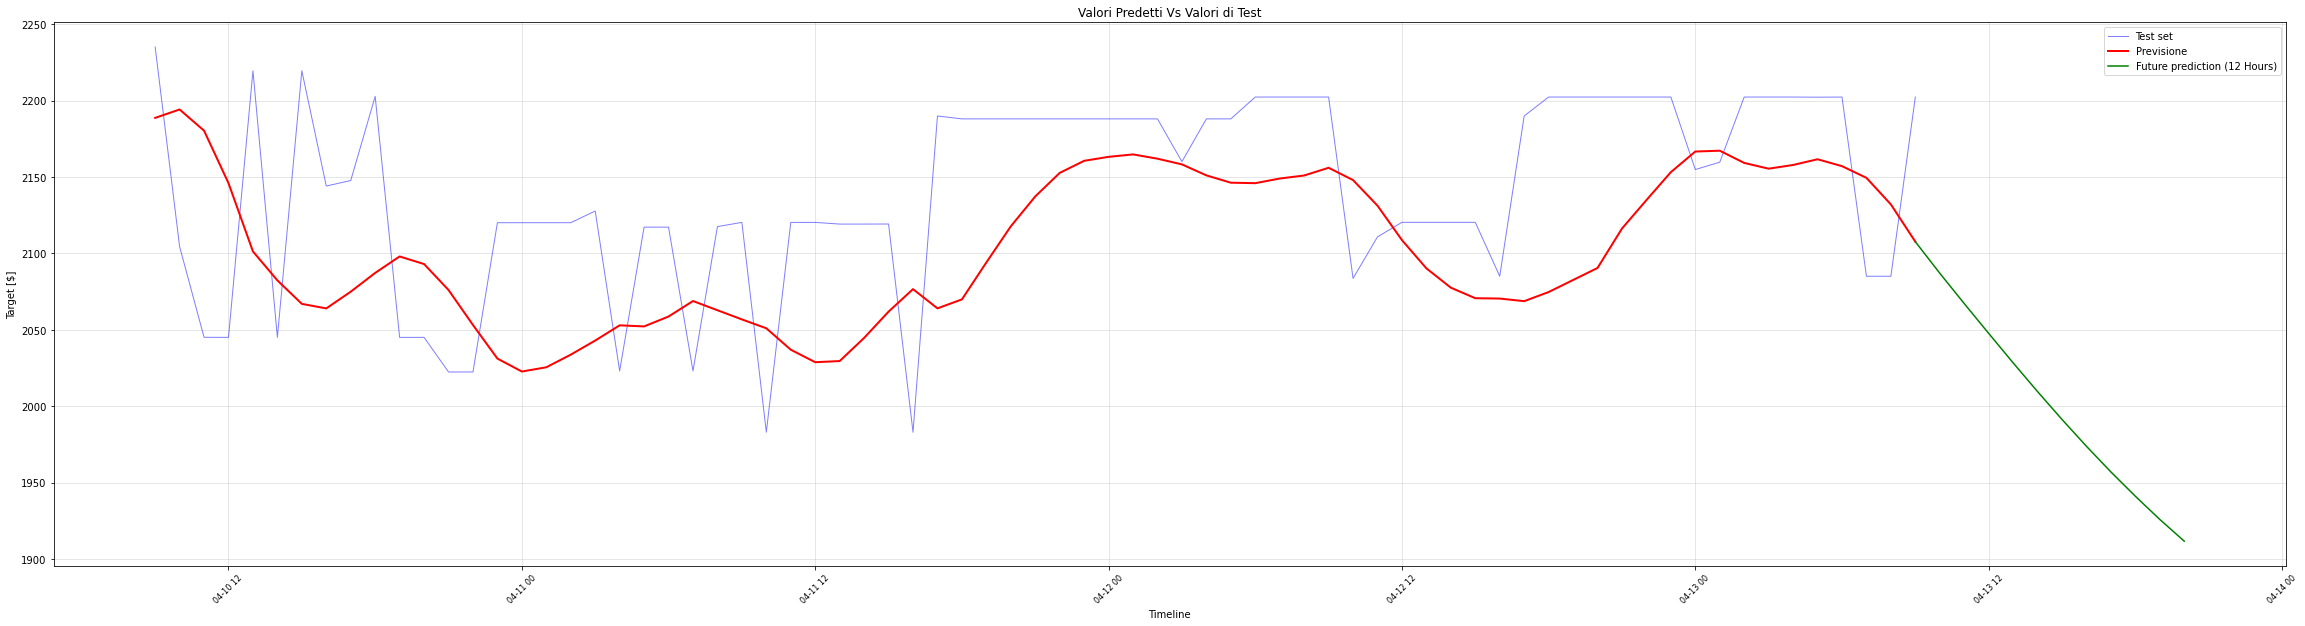

In [50]:
plt.figure(figsize=[40, 10])

plt.plot(y_test_serie.index[-72:], y_test_serie[y_target][-72:], color='blue', linewidth=1, label='Test set', alpha=0.50)
plt.plot(y_pred_serie.index[-72:], y_pred_serie[y_target][-72:], color='red', linewidth=2, label='Previsione')
plt.plot(y_future_serie.index[-n_future_time_steps:], y_future_serie[y_target][-n_future_time_steps:], color='green', label='Future prediction (12 Hours)')

plt.grid(which='major', color='#c1c1c1', alpha=0.5)
plt.title('Valori Predetti Vs Valori di Test')
plt.xlabel('Timeline', fontsize=10)
plt.ylabel('Target [$]', fontsize=10)
plt.xticks(rotation=45, fontsize=8)
plt.legend()

plt.show()

In [51]:
y_future_serie[y_target][-n_future_time_steps:]

2021-04-13 09:00:00    2107.614847
2021-04-13 10:00:00    2086.992084
2021-04-13 11:00:00    2067.119865
2021-04-13 12:00:00    2047.617651
2021-04-13 13:00:00    2028.329293
2021-04-13 14:00:00    2009.502437
2021-04-13 15:00:00    1991.261784
2021-04-13 16:00:00    1973.708117
2021-04-13 17:00:00    1956.918012
2021-04-13 18:00:00    1941.019314
2021-04-13 19:00:00    1925.840150
2021-04-13 20:00:00    1911.602347
Freq: H, Name: close, dtype: float64